In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob
from keras import preprocessing
%matplotlib inline

In [44]:
class_names = ['Eczema', 'Vascular Tumors', 'Bullous Disease', 'Nail Fungus']

In [3]:
img_width = 224
img_height = 224

In [ ]:
# The 4 datasets used for this notebook are 'Eczema Photos', 'Vascular Tumors', 'Bullous Disease', 'Nail Fungus and other Nail Diseases'
# All Locates in the train folder

In [4]:
image_1 = []
for image_path in glob('train/Eczema Photos/*.*'):
    image = preprocessing.image.load_img(image_path,
                                        target_size = (img_width, img_height))
    x = preprocessing.image.img_to_array(image)
    
    image_1.append(x)

    
    
#Load 2nd Image
image_2 = []
for image_path in glob('train/Vascular Tumors/*.*'):
    image = preprocessing.image.load_img(image_path,
                                        target_size = (img_width, img_height))
    x = preprocessing.image.img_to_array(image)
    
    image_2.append(x)
    
#Load 3rd Image
image_3 = []
for image_path in glob('train/Bullous Disease Photos/*.*'):
    image = preprocessing.image.load_img(image_path,
                                        target_size = (img_width, img_height))
    x = preprocessing.image.img_to_array(image)
    
    image_3.append(x)
    
    
    
#Load 4th Image
image_4 = []
for image_path in glob('train/Nail Fungus and other Nail Disease/*.*'):
    image = preprocessing.image.load_img(image_path,
                                        target_size = (img_width, img_height))
    x = preprocessing.image.img_to_array(image)
    
    image_4.append(x)

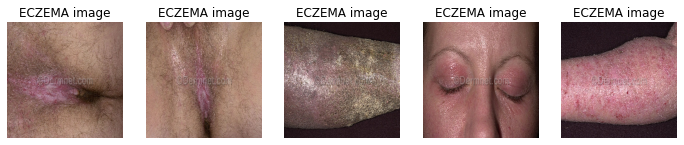

In [5]:
plt.figure(figsize=(12,8))
#picks the first 5 images of the folder
for i, x in enumerate(image_1[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))
    
plt.show()

In [14]:
image_1[30]

array([[[ 4.,  2., 15.],
        [ 4.,  2., 15.],
        [ 4.,  2., 15.],
        ...,
        [ 4.,  2., 16.],
        [ 4.,  2., 16.],
        [ 4.,  2., 16.]],

       [[ 4.,  2., 15.],
        [ 4.,  2., 15.],
        [ 4.,  2., 15.],
        ...,
        [ 4.,  2., 16.],
        [ 4.,  2., 16.],
        [ 4.,  2., 16.]],

       [[ 4.,  2., 15.],
        [ 4.,  2., 15.],
        [ 4.,  2., 15.],
        ...,
        [ 4.,  2., 16.],
        [ 4.,  2., 16.],
        [ 4.,  2., 16.]],

       ...,

       [[13., 23., 33.],
        [15., 25., 34.],
        [13., 23., 32.],
        ...,
        [ 4.,  2., 13.],
        [ 4.,  2., 13.],
        [ 4.,  2., 13.]],

       [[11., 19., 30.],
        [11., 19., 30.],
        [14., 22., 33.],
        ...,
        [ 4.,  2., 13.],
        [ 4.,  2., 13.],
        [ 4.,  2., 13.]],

       [[17., 25., 36.],
        [12., 20., 31.],
        [11., 19., 30.],
        ...,
        [ 4.,  2., 13.],
        [ 4.,  2., 13.],
        [ 4.,  2., 13.]]

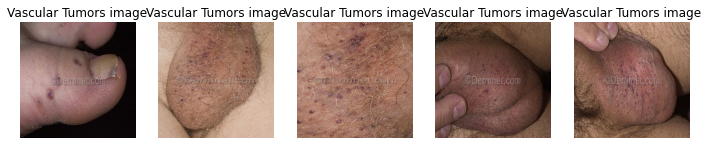

In [7]:
plt.figure(figsize=(12,8))

for i, x in enumerate(image_2[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))
    
plt.show()

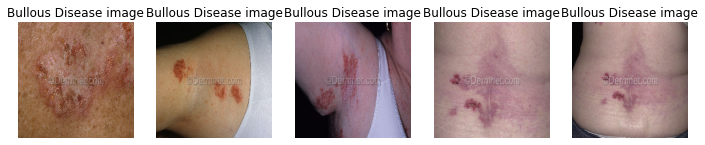

In [8]:
plt.figure(figsize=(12,8))

for i, x in enumerate(image_3[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    plt.axis('off')
    plt.title('{} image'.format(class_names[2]))
    
plt.show()

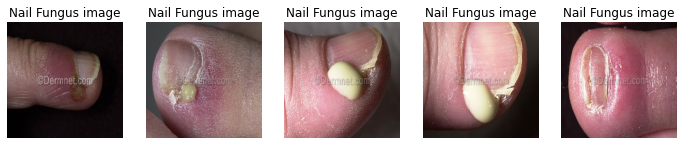

In [9]:
plt.figure(figsize=(12,8))

for i, x in enumerate(image_4[:5]):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(x)
    plt.imshow(image)
    plt.axis('off')
    plt.title('{} image'.format(class_names[3]))
    
plt.show()

In [16]:
X_type_1 = np.array(image_1)
X_type_2 = np.array(image_2)
X_type_3 = np.array(image_3)
X_type_4 = np.array(image_4)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)
print(X_type_4.shape)

(1235, 224, 224, 3)
(482, 224, 224, 3)
(448, 224, 224, 3)
(1040, 224, 224, 3)


In [17]:
X = np.concatenate((X_type_1, X_type_2), axis = 0)

if len(X_type_3):
    X = np.concatenate((X, X_type_3), axis = 0)
    
if len(X_type_4):
    X = np.concatenate((X, X_type_4), axis = 0)
    
#To scale the data to 0, 1 Values
X = X / 255

X.shape

(3205, 224, 224, 3)

In [11]:
# trying to create y_train
from keras.utils import to_categorical

In [18]:
y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]

y = np.concatenate((y_type_1, y_type_2), axis = 0)

if len(y_type_3):
    y = np.concatenate((y, y_type_3), axis = 0)
    
if len(y_type_4):
    y = np.concatenate((y, y_type_4), axis = 0)
    
y = to_categorical(y, num_classes = len(class_names))

print(y.shape)
print(y)

(3205, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [30]:
y #type of image array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
#Time to create a deep network using CNN
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, MaxPooling2D

In [31]:
#To create some default parameters 
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 20
batch_size = 32
color_channels = 3

def build_model(conv_1_drop = conv_1_drop, conv_2_drop =conv_2_drop,
               dense_1_n = dense_1_n, dense_1_drop = dense_1_drop,
               dense_2_n = dense_2_n, dense_2_drop = dense_2_drop,
               lr = lr):
    model = Sequential()
    
    model.add(Convolution2D(conv_1,(3, 3),
                           input_shape = (img_width, img_height, color_channels),
                           activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(conv_1_drop))
    
    model.add(Convolution2D(conv_2, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(conv_2_drop))
    
    model.add(Flatten())
    
    model.add(Dense(dense_1_n, activation = 'relu'))
    model.add(Dropout(dense_1_drop))
    
    model.add(Dense(dense_2_n, activation = 'relu'))
    model.add(Dropout(dense_2_drop))
    
    model.add(Dense(len(class_names), activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', 
                 optimizer = Adam(lr = lr),
                 metrics = ['accuracy'])
    
    return model

In [32]:
import numpy as np
np.random.seed(1) #this is for reproducibility

#to start to build the model
model = build_model()

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)            

In [33]:
X

array([[[[0.57254905, 0.44313726, 0.38431373],
         [0.6313726 , 0.5058824 , 0.45490196],
         [0.58431375, 0.47058824, 0.41568628],
         ...,
         [0.5254902 , 0.38039216, 0.34901962],
         [0.52156866, 0.3764706 , 0.34509805],
         [0.5372549 , 0.38431373, 0.35686275]],

        [[0.54509807, 0.4117647 , 0.37254903],
         [0.5686275 , 0.44313726, 0.4       ],
         [0.5764706 , 0.45882353, 0.41568628],
         ...,
         [0.44313726, 0.30980393, 0.27450982],
         [0.5254902 , 0.38039216, 0.34901962],
         [0.56078434, 0.41568628, 0.38431373]],

        [[0.53333336, 0.40392157, 0.3764706 ],
         [0.59607846, 0.46666667, 0.4392157 ],
         [0.5764706 , 0.45882353, 0.41960785],
         ...,
         [0.53333336, 0.4       , 0.3647059 ],
         [0.5529412 , 0.41960785, 0.38431373],
         [0.57254905, 0.4392157 , 0.40392157]],

        ...,

        [[0.6509804 , 0.5137255 , 0.49803922],
         [0.69411767, 0.5372549 , 0.5372549 ]

In [34]:
model.fit(X, y, epochs = epochs)

Epoch 1/20
101/101 [==============================] - 205s 2s/step - loss: 1.8686 - accuracy: 0.4019
Epoch 2/20
101/101 [==============================] - 119s 1s/step - loss: 1.0609 - accuracy: 0.5285
Epoch 3/20
101/101 [==============================] - 124s 1s/step - loss: 0.9238 - accuracy: 0.6144
Epoch 4/20
101/101 [==============================] - 123s 1s/step - loss: 0.7366 - accuracy: 0.7051
Epoch 5/20
101/101 [==============================] - 123s 1s/step - loss: 0.4974 - accuracy: 0.8140
Epoch 6/20
101/101 [==============================] - 123s 1s/step - loss: 0.3284 - accuracy: 0.8730
Epoch 7/20
101/101 [==============================] - 122s 1s/step - loss: 0.2248 - accuracy: 0.9229
Epoch 8/20
101/101 [==============================] - 127s 1s/step - loss: 0.1761 - accuracy: 0.9423
Epoch 9/20
101/101 [==============================] - 126s 1s/step - loss: 0.1124 - accuracy: 0.9610
Epoch 10/20
101/101 [==============================] - 125s 1s/step - loss: 0.1461 - accura

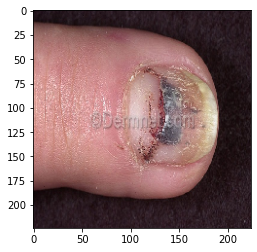

'Nail Fungus'

In [45]:
#Testing out the ML
type_1 = preprocessing.image.load_img('train/Nail Fungus and other Nail Disease/trauma-151.jpg', target_size = (img_width, img_height))

plt.imshow(type_1)
plt.show()

type_1_x = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_x)

class_names[np.argmax(predictions)]

In [41]:
predictions

array([[1., 0., 0., 0.]], dtype=float32)